### **Testing SVM on OOS Data**

In [ ]:
testLangData = [] #variable for all the 5 languages features
testLabelData = [] #variable for all the labels

npy_files = glob.glob("*.npy")

# Select the files you want to process using a list of indices
indices = [0,3,4,5,7,8,11,16,18,19]
for index in indices:
    if index < len(npy_files):
        filename = npy_files[index]
        oneLangData = np.load(filename, allow_pickle=True)
        langTrainData = oneLangData[0:4999, 4]
        testLangData += [x.flatten().tolist() for x in langTrainData]
        label = oneLangData[0:4999, 1].tolist()
        testLabelData += label


#convert both lists to numpy array to feed to the classifier
testLangDataAsArray = np.asarray(testLangData)
testLabelDataAsArray = np.asarray(testLabelData)
print(testLangDataAsArray.shape)
print(testLabelDataAsArray.shape)

#data scaling
scaler = StandardScaler()
# keep our unscaled features just in case we need to process them alternatively
featurestest_scaled = testLangDataAsArray
featurestest_scaled = scaler.fit_transform(featurestest_scaled)

#dimensionality reduction
# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=69)
# Fit and transform the scaled features
components_tsnetest = tsne.fit_transform(features_scaled)
kl_divergence = tsne.kl_divergence_
print("KL Divergence:", kl_divergence)

#printing Standard sacled features
#print('\033[1m'+'Standard Scaling:\n'+'\033[0m')
#features_scaled_df = pd.DataFrame(features_scaled)
#print(features_scaled_df)

#data splitting
X_Test, y_Test = components_tsnetest, testLabelDataAsArray

(49990, 256)
(49990,)
KL Divergence: 1.6578925848007202


In [ ]:
class_probabilities = svm_model.predict_proba(X_Test)

In [ ]:
# Get unique class labels
class_labels = np.unique(y_test_scaled)

# Create a dictionary to store highest probabilities for each class
highest_probs = {label: [] for label in class_labels}

# Append highest probabilities to corresponding classes
for probs in class_probabilities:
    highest_prob = np.max(probs)
    predicted_class_index = np.argmax(probs)
    predicted_class = class_labels[predicted_class_index]
    highest_probs[predicted_class].append(highest_prob)

# Calculate mean, standard deviation, and threshold for each class
thresholds = {}
for label, probs in highest_probs.items():
    probs_array = np.array(probs)
    mean_prob = np.mean(probs_array)
    std_dev = np.std(probs_array)
    threshold = mean_prob - std_dev
    thresholds[label] = threshold

# Iterate through instances and check against thresholds
for i, probs in enumerate(class_probabilities):
    highest_prob = np.max(probs)
    predicted_class_index = np.argmax(probs)
    predicted_class = class_labels[predicted_class_index]

    if highest_prob >= thresholds[predicted_class]:
        print(f"Instance {i+1}: Predicted Class - {predicted_class}")
    else:
        print(f"Instance {i+1}: Out of Set")

In [ ]:
0# Get unique class labels
class_labels = np.unique(y_test_scaled)

# Create a dictionary to store highest probabilities for each class
highest_probs = {label: [] for label in class_labels}

# Append highest probabilities to corresponding classes
for probs in class_probabilities:
    highest_prob = np.max(probs)
    predicted_class_index = np.argmax(probs)
    predicted_class = class_labels[predicted_class_index]
    highest_probs[predicted_class].append(highest_prob)

# Calculate mean, standard deviation, and threshold for each class
thresholds = {}
for label, probs in highest_probs.items():
    probs_array = np.array(probs)
    mean_prob = np.mean(probs_array)
    std_dev = np.std(probs_array)
    threshold = mean_prob - std_dev
    thresholds[label] = threshold

# Iterate through instances and check against thresholds
for i, (probs, true_label) in enumerate(zip(class_probabilities, y_Test)):
    highest_prob = np.max(probs)
    predicted_class_index = np.argmax(probs)
    predicted_class = class_labels[predicted_class_index]

    if highest_prob >= thresholds[predicted_class]:
        print(f"Instance {i+1}: True - {true_label}, Predicted - {predicted_class}")
    else:
        print(f"Instance {i+1}: True - {true_label}, Out of Set")

Streaming output truncated to the last 5000 lines.
Instance 44991: True - vi-Vietnamese, Predicted - te-Telugu
Instance 44992: True - zh-Mandarin, Predicted - ur-Urdu
Instance 44993: True - zh-Mandarin, Predicted - ur-Urdu
Instance 44994: True - zh-Mandarin, Predicted - ur-Urdu
Instance 44995: True - zh-Mandarin, Predicted - ur-Urdu
Instance 44996: True - zh-Mandarin, Predicted - ur-Urdu
Instance 44997: True - zh-Mandarin, Predicted - ur-Urdu
Instance 44998: True - zh-Mandarin, Predicted - ur-Urdu
Instance 44999: True - zh-Mandarin, Predicted - ur-Urdu
Instance 45000: True - zh-Mandarin, Predicted - ur-Urdu
Instance 45001: True - zh-Mandarin, Predicted - hi-Hindi
Instance 45002: True - zh-Mandarin, Out of Set
Instance 45003: True - zh-Mandarin, Predicted - ur-Urdu
Instance 45004: True - zh-Mandarin, Predicted - ur-Urdu
Instance 45005: True - zh-Mandarin, Predicted - ur-Urdu
Instance 45006: True - zh-Mandarin, Predicted - ur-Urdu
Instance 45007: True - zh-Mandarin, Predicted - ur-Urdu
I

In [ ]:
from collections import defaultdict

# ... (Previous code for calculating probabilities, thresholds, etc.)

# Initialize a dictionary to store counts
class_counts = defaultdict(lambda: {"Out of Set": 0, "Predicted": 0})

# Iterate through instances and check against thresholds
for i, (probs, true_label) in enumerate(zip(class_probabilities, y_Test)):
    highest_prob = np.max(probs)
    predicted_class_index = np.argmax(probs)
    predicted_class = class_labels[predicted_class_index]

    if highest_prob >= thresholds[predicted_class]:
        class_counts[true_label]["Predicted"] += 1
    else:
        class_counts[true_label]["Out of Set"] += 1

# Print results
for label, counts in class_counts.items():
    print(f"Class {label}:")
    print(f"  Out of Set: {counts['Out of Set']}")
    print(f"  Predicted: {counts['Predicted']}")

Class ar-Arabic:
  Out of Set: 460
  Predicted: 4539
Class bo-Tibetan:
  Out of Set: 997
  Predicted: 4002
Class en-English:
  Out of Set: 1004
  Predicted: 3995
Class fa-Persian:
  Out of Set: 614
  Predicted: 4385
Class id-Indonesian:
  Out of Set: 884
  Predicted: 4115
Class my-Burmese:
  Out of Set: 796
  Predicted: 4203
Class ps-Pushto:
  Out of Set: 584
  Predicted: 4415
Class th-Thai:
  Out of Set: 672
  Predicted: 4327
Class vi-Vietnamese:
  Out of Set: 664
  Predicted: 4335
Class zh-Mandarin:
  Out of Set: 1120
  Predicted: 3879


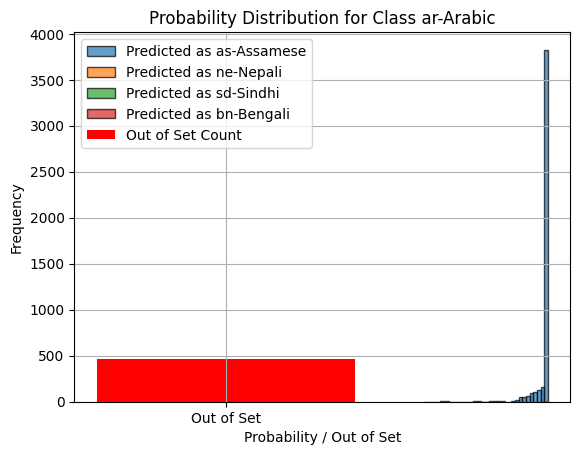

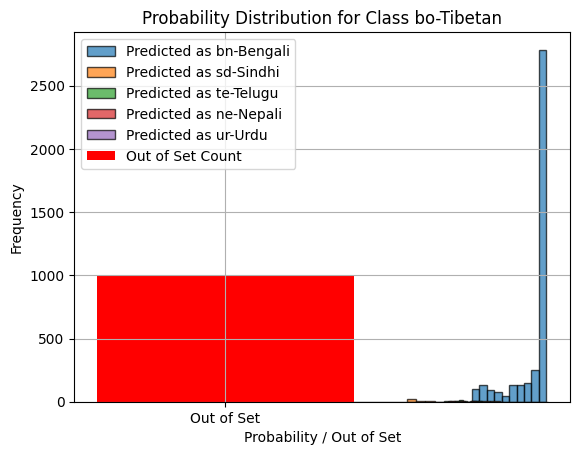

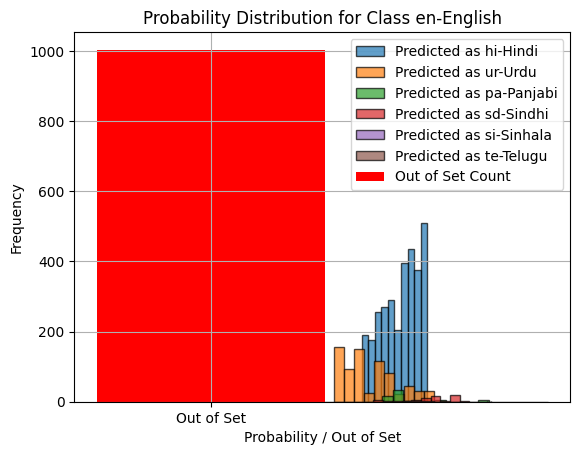

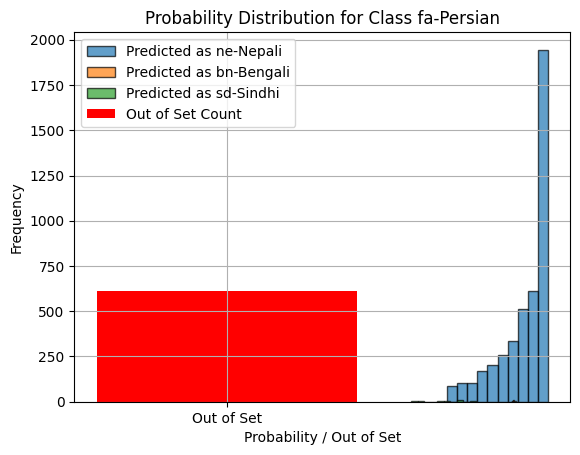

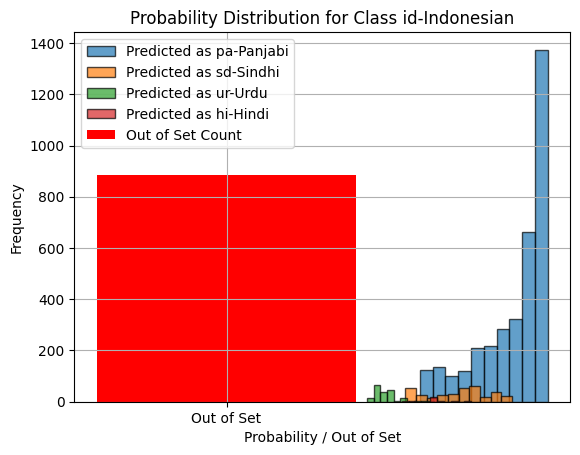

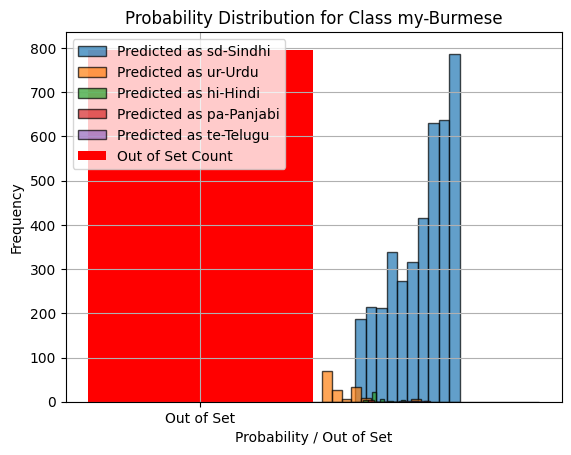

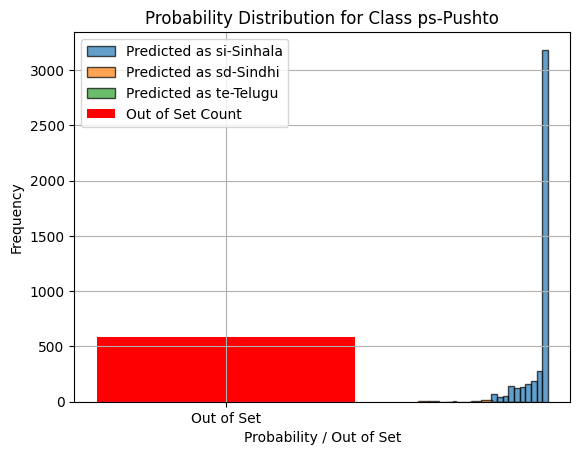

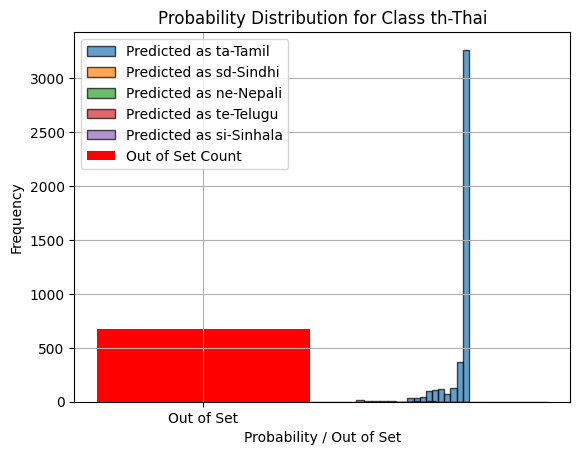

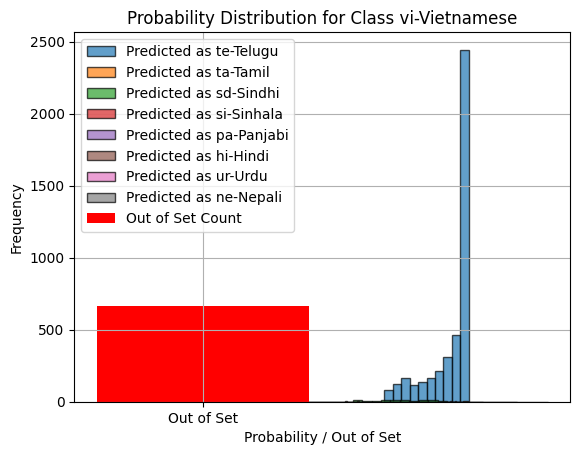

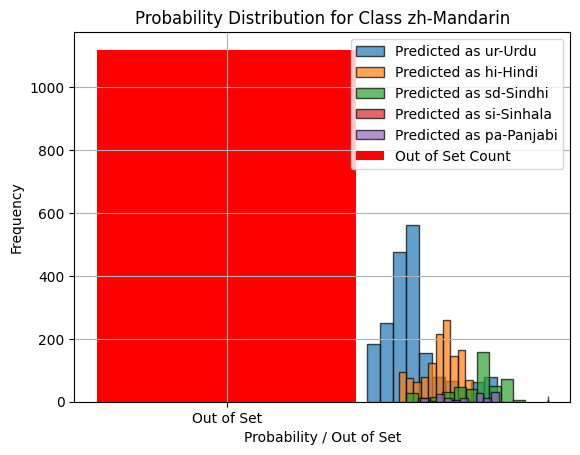

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict

# ... (Previous code for calculating probabilities, thresholds, etc.)

# Iterate over each class label
for label in np.unique(y_Test):
    probabilities_in_class = defaultdict(list)
    out_of_set_count = 0

    # Filter instances for the current class and collect probabilities
    for i, (probs, true_label) in enumerate(zip(class_probabilities, y_Test)):
        if true_label == label:
            highest_prob = np.max(probs)
            predicted_class_index = np.argmax(probs)
            predicted_class = class_labels[predicted_class_index]

            if highest_prob >= thresholds[predicted_class]:
                probabilities_in_class[predicted_class].append(highest_prob)
            else:
                out_of_set_count += 1

    # Plot histogram for the current class
    plt.figure()
    for predicted_label, probs in probabilities_in_class.items():
        plt.hist(probs, bins=10, edgecolor='black', alpha=0.7, label=f"Predicted as {predicted_label}")
    plt.bar("Out of Set", out_of_set_count, color='red', label="Out of Set Count")

    plt.xlabel('Probability / Out of Set')
    plt.ylabel('Frequency')
    plt.title(f'Probability Distribution for Class {label}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# ... (Previous code for calculating probabilities, thresholds, etc.)

total_out_of_set = 0
total_instances = 0

# Iterate through instances and count "Out of Set" predictions
for i, (probs, true_label) in enumerate(zip(class_probabilities, y_Test)):
    highest_prob = np.max(probs)
    predicted_class_index = np.argmax(probs)
    predicted_class = class_labels[predicted_class_index]

    total_instances += 1
    if highest_prob < thresholds[predicted_class]:
        total_out_of_set += 1

# Calculate overall "Out of Set" percentage
out_of_set_percentage = (total_out_of_set / total_instances) * 100

# Print count and percentage of "Out of Set" predictions
print("Count of Out of Set Predictions:", total_out_of_set)
print(f"Overall Out of Set Percentage: {out_of_set_percentage:.2f}%")

Count of Out of Set Predictions: 7799
Overall Out of Set Percentage: 15.60%


In [ ]:
# ... (Previous code for calculating probabilities, thresholds, etc.)

# Initialize a dictionary to store counts
class_counts = defaultdict(lambda: {"Out of Set": 0, "Total": 0})

# Iterate through instances and update counts
for i, (probs, true_label) in enumerate(zip(class_probabilities, y_Test)):
    highest_prob = np.max(probs)
    predicted_class_index = np.argmax(probs)
    predicted_class = class_labels[predicted_class_index]

    class_counts[true_label]["Total"] += 1
    if highest_prob < thresholds[predicted_class]:
        class_counts[true_label]["Out of Set"] += 1

# Print out-of-set percentages for each class
for label, counts in class_counts.items():
    out_of_set_percentage = (counts["Out of Set"] / counts["Total"]) * 100
    print(f"Class {label}: Out of Set Percentage = {out_of_set_percentage:.2f}%")

Class ar-Arabic: Out of Set Percentage = 9.20%
Class bo-Tibetan: Out of Set Percentage = 19.94%
Class en-English: Out of Set Percentage = 20.08%
Class fa-Persian: Out of Set Percentage = 12.28%
Class id-Indonesian: Out of Set Percentage = 17.68%
Class my-Burmese: Out of Set Percentage = 15.92%
Class ps-Pushto: Out of Set Percentage = 11.68%
Class th-Thai: Out of Set Percentage = 13.44%
Class vi-Vietnamese: Out of Set Percentage = 13.28%
Class zh-Mandarin: Out of Set Percentage = 22.40%


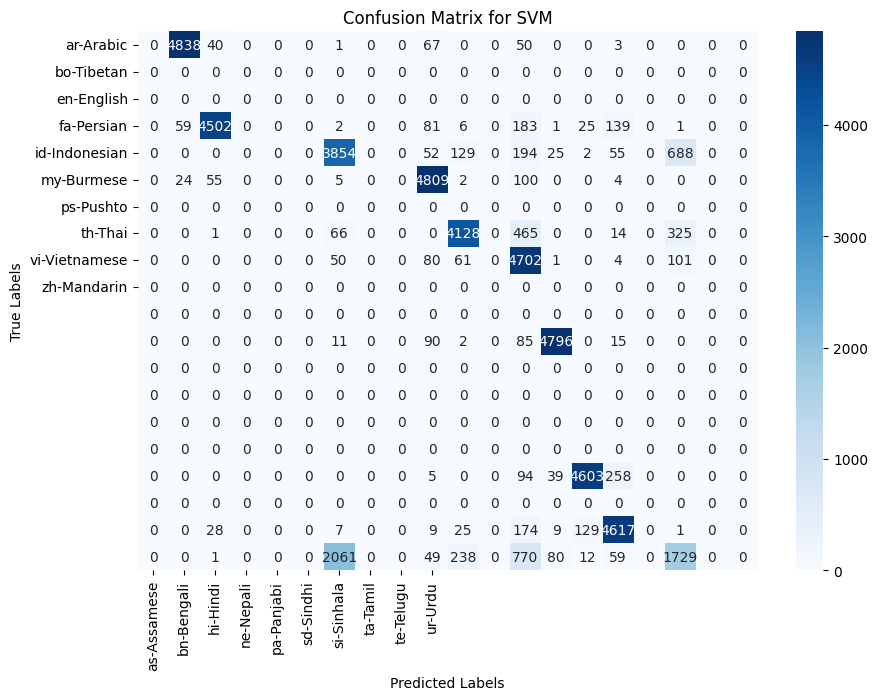

In [ ]:

# Predict classes using the trained SVM model
y_pred = svm_model.predict(X_Test)


# Calculate the confusion matrix
cm = confusion_matrix(y_Test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test_scaled),
            yticklabels=np.unique(y_Test))

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM')
plt.show()

In [ ]:
#clf is trained OC-SVM classifier
#languages taken: 8:Burmese, 11:pushto, 16:Thai, 18:Vietnamese, 19:Mandarian
Testing = clf.predict(X_Test) # Scaled features of testing data passing through trained c-svm
outliers = np.count_nonzero(Testing == -1)
inliers = np.count_nonzero(Testing == 1)
print("\n\n")
print("Testing Data")
print("Outliers:",outliers)
print("Inliers:",inliers)

#src = (clf.score_samples(X))
#finding labels
#outlier_indices = np.where(Testing == -1)[0]
#outlier_labels = y_Test[outlier_indices]
#print(f"Outlier Labels: {outlier_labels}")
#label_counts = Counter(outlier_labels)
#df = pd.DataFrame.from_dict(label_counts, orient='index', columns=['Count'])
#print("\n")
#print("Outliers:")
#print(df)

#finding labels
#inlier_indices = np.where(Testing == 1)[0]
#inlier_labels = y_Test[inlier_indices]
#print(f"Outlier Labels: {outlier_labels}")
#label_counts = Counter(inlier_labels)
#df = pd.DataFrame.from_dict(label_counts, orient='index', columns=['Count'])
#print("\n\n")
#print("Inliers:")
#print(df)

In [ ]:
# Predict class probabilities
class_probabilities = svm_model.predict_proba(X_Test)

# Get unique class labels
class_labels = np.unique(y_Test)

# Calculate and print average probabilities for each class
for j, label in enumerate(class_labels):
    class_probs = class_probabilities[:, j]  # Get probabilities for this class
    highest_prob = np.max(class_probs)
    print(f"Class {label}: Highest Probability = {highest_prob:.4f}")

In [ ]:
y_pred = svm_model.predict(X_Test)

# Calculate the confusion matrix
cm = confusion_matrix(y_Test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_Test),
            yticklabels=np.unique(totalLangDataAsArray))

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM')
plt.show()